# **TUGAS PRAKTIKUM**

In [ ]:
def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None, label_names=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))

    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])
    unique_labels = sorted(list(set(labels)))
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        legend_label = None
        if label_names is not None:
            if k >= 0 and k < len(label_names):
                legend_label = label_names[k]
            elif k == -1:
                legend_label = "Noise"

        class_mask = (labels == k)
        if k == -1:
            col = [0, 0, 0, 1]  # Warna hitam untuk noise
            marker = "x"
            sizes = 16
        else:
            marker = "o"
            sizes = (1 + 5 * probabilities[class_mask])**2

        ax.scatter(
            X[class_mask, 0],
            X[class_mask, 1],
            marker=marker,
            facecolor=tuple(col),
            edgecolor="k",
            s=sizes,
            label=legend_label
        )

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"

    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"

    ax.set_title(title)

    if any(ax.get_legend_handles_labels()[1]):
        ax.legend()

    plt.tight_layout()

1. Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).

In [ ]:
!pip install -q hdbscan
import hdbscan
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
y = iris.target

2. Lakukan clustering dengan HDBSCAN.

In [ ]:
clusterer = hdbscan.HDBSCAN().fit(X)
hdbscan_labels = clusterer.labels_

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


3. Laporkan hasil:
- Jumlah cluster yang terbentuk.
- Banyaknya noise.
- Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu).

Jumlah cluster terbentuk: 2
Jumlah noise: 0


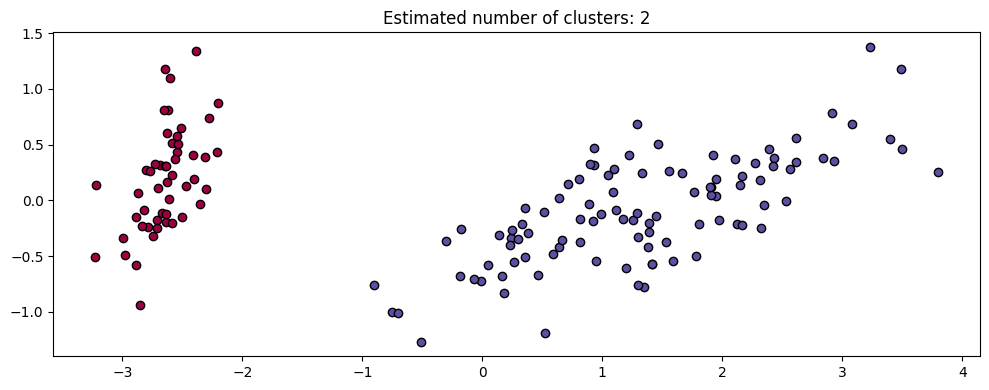

In [ ]:
n_clusters = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
n_noise = np.sum(hdbscan_labels == -1)
print("Jumlah cluster terbentuk:", n_clusters)
print("Jumlah noise:", n_noise)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plot(X_pca, hdbscan_labels)

4. Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?



- Dataset: Iris (memiliki 150 sampel dan 3 kelas: setosa, versicolor, virginica).

- Hasil clustering HDBSCAN cukup sejalan dengan label asli untuk kelas Setosa, tetapi kurang memisahkan dengan jelas antara Versicolor dan Virginica.
Algoritma ini efektif dalam mendeteksi noise dan area padat, namun tidak sepenuhnya mereplikasi label asli karena pendekatannya berbasis kepadatan, bukan label kelas.

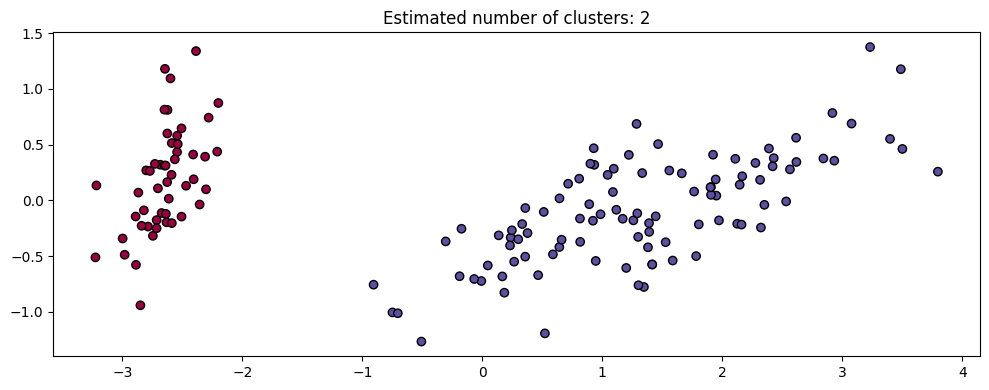

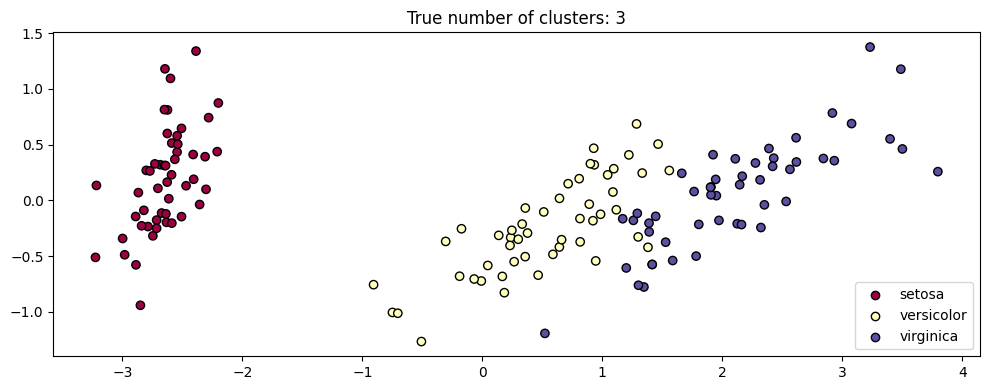

In [ ]:
plot(X_pca, hdbscan_labels)
plot(X_pca, iris.target, ground_truth=True, label_names=iris.target_names)